In [1]:
using Flux
using TOML
using Pkg
using Plots
using BSON: @save
using PyCall

In [2]:
env_path = TOML.parse(read("mltools.toml", String))["env_path"]
Pkg.activate(env_path)

  Activating environment at `C:\Users\nikhi\OneDrive\Documents\julia\MLTools\Project.toml`


In [3]:
import MLTools as mlt

In [4]:
xpath = joinpath(@__DIR__, "data\\augmented_x.csv")
ypath = joinpath(@__DIR__, "data\\augmented_y.csv")

"c:\\Users\\nikhi\\OneDrive\\Documents\\julia\\flux\\eeg\\data\\augmented_y.csv"

In [5]:
trainX = mlt.dfToMatrix(mlt.getdf(xpath))
trainY = mlt.dfToMatrix(mlt.getdf(ypath))

9450×7 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮    
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0

In [6]:
xpath = joinpath(@__DIR__, "data\\pca_data.csv")
ypath = joinpath(@__DIR__, "data\\ydata.csv")

"c:\\Users\\nikhi\\OneDrive\\Documents\\julia\\flux\\eeg\\data\\ydata.csv"

In [7]:
testX = mlt.dfToMatrix(mlt.getdf(xpath))
testY = mlt.dfToMatrix(mlt.getdf(ypath))

945×7 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮    
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0

In [8]:
normal_factor = maximum(abs.(vcat(trainX, testX)))

3.1017096597041305

In [9]:
trainX /= normal_factor
testX /= normal_factor

945×81 Matrix{Float64}:
 -0.354051    0.0182832     0.0221252   …   1.27714e-5   0.00179743
 -0.197561   -0.0799413     0.0102533      -0.00821046  -0.00247141
 -0.0555417   0.15456      -0.0448797      -0.00467715  -0.0156004
 -0.119744    0.0156377     0.084375        0.0081429   -0.00103648
  0.171182    0.155525      0.0694715      -0.00125069   0.0044048
  0.497692   -0.102419     -0.0672887   …   0.0118017   -0.00555215
 -0.150186    0.084327     -0.0750029       0.00749376  -0.011078
  0.117882   -0.0201927    -0.0688173       0.00811342  -0.0309017
 -0.160859   -0.0288665    -0.0340838      -0.0239079    0.00333394
  0.0676128  -0.183914      0.00979465      0.0135134    0.00365132
 -0.131004   -0.0645971     0.0164832   …   0.00190703   0.00879971
  0.14343    -0.0100609     0.024557        0.0176       0.000732294
  0.232005    0.0523848     0.034179        0.0348327    0.00938487
  ⋮                                     ⋱                ⋮
 -0.188576   -0.131068      0.092795 

In [10]:
trainX = trainX'
trainY = trainY'
testX = testX'
testY = testY'

7×945 adjoint(::Matrix{Float64}) with eltype Float64:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [11]:
size(trainX), size(trainY), size(testX), size(testY)

((81, 9450), (7, 9450), (81, 945), (7, 945))

In [12]:
n = size(trainX)[begin]
n_out = size(trainY)[begin]

model = Chain(
    Dense(n => 2 * n), relu,
    Dense(2 * n => 3 * n), relu,
    Dense(3 * n => 2 * n), relu,
    Dense(2 * n => n_out), softmax
)

parameters = Flux.params(model)
bestModel = Flux.params(model)

Params([Float32[0.10443862 -0.023776218 … -0.13838947 0.11182226; -0.15417276 -0.11117646 … -0.07530507 0.014482332; … ; -0.08232857 -0.13004798 … 0.056620754 0.02334692; -0.11125127 -0.11745885 … 0.13847788 -0.07463446], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.03642838 0.11023605 … 0.09382019 -0.07823937; 0.056547694 0.0013227906 … 0.094911 0.09088659; … ; 0.009673379 0.04499528 … -0.033330213 0.11012955; -0.11641898 -0.051520694 … 0.0024381797 -0.044542], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.1131415 0.019996213 … 0.11238082 0.03227272; -0.081358135 -0.119065456 … 0.045968793 0.08581479; … ; -0.035757657 -0.025392339 … -0.030073542 0.11889706; -0.0029291296 0.047337435 … 0.111466795 0.068266444], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.0317

In [13]:
loss(x,y) = Flux.crossentropy(model(x), y)

loss (generic function with 1 method)

In [14]:
mean(iterable) = sum(iterable)/length(iterable)
coldEncoding(var) = [getindex(i, 2) for i in findmax(var, dims=2)[end]]
accuracy(ŷ, y) = mean(coldEncoding(model(ŷ)') .== coldEncoding(y'))

accuracy (generic function with 1 method)

In [15]:
training_losses = []
testing_losses = []
training_acc = []
testing_acc = []

Any[]

In [16]:
opt = Adam(.01)
data = Flux.DataLoader((trainX, trainY); batchsize=32, shuffle=true)

MLUtils.DataLoader{Tuple{LinearAlgebra.Adjoint{Float64, Matrix{Float64}}, LinearAlgebra.Adjoint{Float64, Matrix{Float64}}}, Random._GLOBAL_RNG}(([-0.36292361911889764 -0.35390702881632247 … 0.0460188897188732 0.021287100217173748; 0.03460330555572289 0.006683016935326597 … 0.1521104000396692 0.18418702799902903; … ; 0.011378698391647981 -0.020807462523214856 … 0.025134279555321295 0.01838832473056251; 0.016888943312128455 0.03019073862666953 … 0.02250407126517247 0.0019435384429681707], [1.0 1.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]), 32, 9450, true, true, Random._GLOBAL_RNG())

In [17]:
epochs = 1:100

for i in epochs
    println("Epoch: $i")

    Flux.train!(loss, parameters, data, opt)

    push!(training_losses, loss(trainX, trainY))
    push!(testing_losses, loss(testX, testY))

    push!(training_acc, accuracy(trainX, trainY))
    push!(testing_acc, accuracy(testX, testY))

    println("training loss: $(training_losses[end])")
    println("testing loss: $(testing_losses[end])")
    println("training acc: $(training_acc[end])")
    println("testing acc: $(testing_acc[end])")

    mlt.saveMin!(bestModel, parameters, testing_acc .* -1)
end

Epoch: 1
training loss: 1.4823625795508564
testing loss: 1.4424672676214907
training acc: 0.42994708994708997
testing acc: 0.4486772486772487
Epoch: 2
training loss: 1.1435447469228732
testing loss: 1.0833661086576514
training acc: 0.5792592592592593
testing acc: 0.638095238095238
Epoch: 3
training loss: 0.7646112377821909
testing loss: 0.697760050383518
training acc: 0.7166137566137566
testing acc: 0.7587301587301587
Epoch: 4
training loss: 0.5567736256754248
testing loss: 0.4719826525020926
training acc: 0.8014814814814815
testing acc: 0.8338624338624339
Epoch: 5
training loss: 0.44019412835538013
testing loss: 0.3776346231264751
training acc: 0.8396825396825397
testing acc: 0.8624338624338624
Epoch: 6
training loss: 0.28327203017836355
testing loss: 0.237719250992034
training acc: 0.9053968253968254
testing acc: 0.9185185185185185
Epoch: 7
training loss: 0.268919778864669
testing loss: 0.20033886492878034
training acc: 0.9106878306878307
testing acc: 0.9428571428571428
Epoch: 8
trai

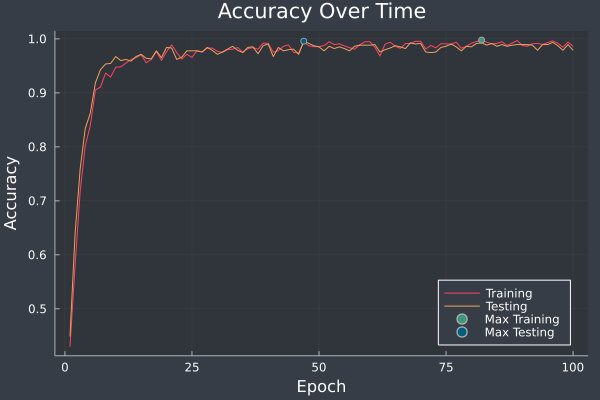

In [18]:
theme(:dark)
plot([training_acc, testing_acc], labels=["Training" "Testing"])
scatter!([findall(x -> x == maximum(training_acc), training_acc)[begin]],
        [maximum(training_acc)],
        labels="Max Training"
)
scatter!([findall(x -> x == maximum(testing_acc), testing_acc)[begin]],
        [maximum(testing_acc)],
        labels="Max Testing"
)
plot!(title="Accuracy Over Time", xlabel="Epoch", ylabel="Accuracy", legend=:bottomright)

In [19]:
@save "qeeg_pca_model.bson" bestModel

In [20]:
# save prediction at best testing epoch

In [21]:
pred = model(trainX)
size(pred)

(7, 9450)

In [22]:
f = open("best_pred.txt", "w+")

for i in 1:size(pred)[begin]
	println(f, pred[i, :])
end

close(f)

f = open("training_losses.txt", "w+")

for i in training_losses
	println(f, i)
end

close(f)

f = open("testing_losses.txt", "w+")

for i in testing_losses
	println(f, i)
end

close(f)

f = open("training_acc.txt", "w+")

for i in training_acc
	println(f, i)
end

close(f)

f = open("testing_acc.txt", "w+")

for i in testing_acc
	println(f, i)
end

close(f)